# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from ppo import run_ppo

run_ppo(env, seed=257)

/Users/hoonji/Workspace/rlnd/deep-reinforcement-learning/p3_collab-compet/ppo.py:139: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  dtype=torch.float32)).squeeze(-1)


episode 50. Last update in 3.0359878540039062s
last 100 returns: 0.005000000260770321
episode 100. Last update in 2.535626173019409s
last 100 returns: -0.0009999998286366462
episode 150. Last update in 2.2908880710601807s
last 100 returns: -0.004999999888241291
episode 200. Last update in 2.3567070960998535s
last 100 returns: -0.00399999987334013
episode 250. Last update in 2.191376209259033s
last 100 returns: -0.004999999888241291
episode 300. Last update in 2.2333500385284424s
last 100 returns: -0.004999999888241291
episode 350. Last update in 2.4684386253356934s
last 100 returns: -0.0029999998584389685
episode 400. Last update in 2.3099918365478516s
last 100 returns: -0.00399999987334013
episode 450. Last update in 2.319916009902954s
last 100 returns: -0.004999999888241291
episode 500. Last update in 2.4138190746307373s
last 100 returns: -0.00399999987334013
episode 550. Last update in 2.385465145111084s
last 100 returns: -0.0009999998286366462
episode 600. Last update in 2.36728501

episode 4700. Last update in 2.45145583152771s
last 100 returns: -0.0009999998286366462
episode 4750. Last update in 2.4789440631866455s
last 100 returns: 1.8626451492309571e-10
episode 4800. Last update in 2.3357388973236084s
last 100 returns: -0.00399999987334013
episode 4850. Last update in 2.4684207439422607s
last 100 returns: -0.0009999998286366462
episode 4900. Last update in 2.310091018676758s
last 100 returns: -0.00399999987334013
episode 4950. Last update in 2.5244507789611816s
last 100 returns: 1.8626451492309571e-10
episode 5000. Last update in 2.9970009326934814s
last 100 returns: 0.009000000320374965
episode 5050. Last update in 2.6837940216064453s
last 100 returns: 0.004000000245869159
episode 5100. Last update in 2.6896469593048096s
last 100 returns: 0.0030000002309679987
episode 5150. Last update in 2.8829362392425537s
last 100 returns: 0.009000000320374965
episode 5200. Last update in 2.9583749771118164s
last 100 returns: 0.011000000350177288
episode 5250. Last update 

episode 9400. Last update in 2.7765071392059326s
last 100 returns: 0.006000000275671482
episode 9450. Last update in 3.1975040435791016s
last 100 returns: 0.01300000037997961
episode 9500. Last update in 2.83444881439209s
last 100 returns: 0.007000000290572643
episode 9550. Last update in 3.024369955062866s
last 100 returns: 0.011000000350177288
episode 9600. Last update in 3.1261250972747803s
last 100 returns: 0.016000000424683095
episode 9650. Last update in 2.9414148330688477s
last 100 returns: 0.012000000365078449
episode 9700. Last update in 2.74455189704895s
last 100 returns: 0.005900000277906656
episode 9750. Last update in 3.1263670921325684s
last 100 returns: 0.014000000394880772
episode 9800. Last update in 2.986755132675171s
last 100 returns: 0.010000000335276127
episode 9850. Last update in 2.753880023956299s
last 100 returns: 0.004900000263005495
episode 9900. Last update in 2.5542924404144287s
last 100 returns: 0.0010000002011656762
episode 9950. Last update in 2.58037471

episode 14050. Last update in 2.8308780193328857s
last 100 returns: 0.010000000335276127
episode 14100. Last update in 2.88978910446167s
last 100 returns: 0.007000000290572643
episode 14150. Last update in 2.8381810188293457s
last 100 returns: 0.006000000275671482
episode 14200. Last update in 2.7991652488708496s
last 100 returns: 0.007000000290572643
episode 14250. Last update in 2.855513095855713s
last 100 returns: 0.007000000290572643
episode 14300. Last update in 3.004155158996582s
last 100 returns: 0.010000000335276127
episode 14350. Last update in 2.8952157497406006s
last 100 returns: 0.006000000275671482
episode 14400. Last update in 2.6724836826324463s
last 100 returns: 0.002000000216066837
episode 14450. Last update in 2.7000210285186768s
last 100 returns: 0.004000000245869159
episode 14500. Last update in 2.952198028564453s
last 100 returns: 0.009000000320374965
episode 14550. Last update in 3.17798113822937s
last 100 returns: 0.014000000394880772
episode 14600. Last update i

episode 18700. Last update in 2.588318347930908s
last 100 returns: 0.0030000002309679987
episode 18750. Last update in 3.0647120475769043s
last 100 returns: 0.011000000350177288
episode 18800. Last update in 2.899275064468384s
last 100 returns: 0.006000000275671482
episode 18850. Last update in 3.0975611209869385s
last 100 returns: 0.012000000365078449
episode 18900. Last update in 3.113804817199707s
last 100 returns: 0.008000000305473804
episode 18950. Last update in 2.750119209289551s
last 100 returns: 0.004000000245869159
episode 19000. Last update in 2.9292640686035156s
last 100 returns: 0.010000000335276127
episode 19050. Last update in 2.681849956512451s
last 100 returns: 0.004000000245869159
episode 19100. Last update in 2.544010877609253s
last 100 returns: 0.002000000216066837
episode 19150. Last update in 3.0610039234161377s
last 100 returns: 0.010000000335276127
episode 19200. Last update in 2.8038249015808105s
last 100 returns: 0.005000000260770321
episode 19250. Last update

In [6]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


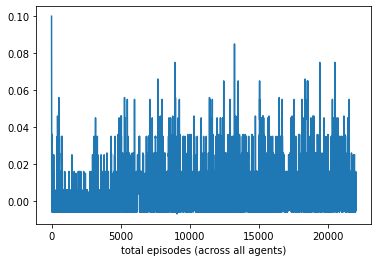

In [7]:
def copy_model_and_plot_learning_curve():
    import pickle
    import matplotlib.pyplot as plt
    from collections import deque
    import os
    import datetime
    import shutil
    
    datetime_stamp = datetime.datetime.now().strftime('%y%m%d_%H%M')
    plot_path = f'checkpoints/{datetime_stamp}'
    
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)
    else:
        print(f'directory {plot_path} already exists')
        return
    
    shutil.copyfile(f'{brain_name}_scores.pickle', f'{plot_path}/scores.pickle')
    shutil.copyfile(f'{brain_name}_model_checkpoint.pickle', f'{plot_path}/model.pickle')

    with open(f'{plot_path}/scores.pickle', 'rb') as f:
        total_rewards = pickle.load(f)

    smoothed = []
    queue = deque([], maxlen=10)
    for r in total_rewards:
        queue.append(r)
        smoothed.append(sum(queue)/len(queue))
    fig,ax = plt.subplots()
    ax.plot(smoothed)
    ax.set_xlabel('total episodes (across all agents)')
    plt.savefig(f'{plot_path}/learning_curve.png')
    plt.show()
copy_model_and_plot_learning_curve()